In [103]:
# Importa bibliotecas
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


In [104]:
# Usa pandas para ler o csv
df = pd.read_csv("D:\\Codigos\\Fatec\\lab4\\kmeans\\Mall_Customers.csv")
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [105]:
# Para esse modelo simples vamos usar somente Age e Spending Score
df = df[['Age', 'Spending Score (1-100)']]
df.head()


,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


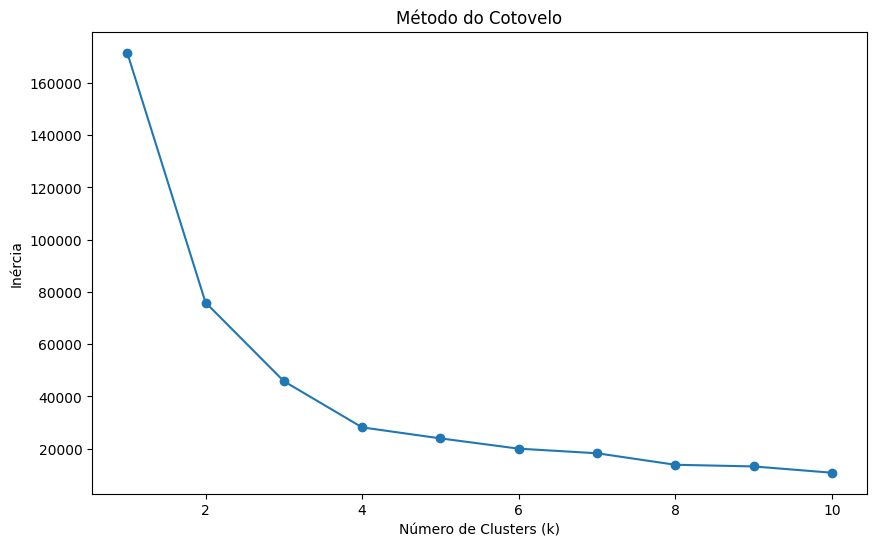

In [106]:
# Para descobrir a quantidade de clusters usei "elbow method" (traduzido pra Método do cotovelo) o metodo tem esse nome
# pois o numero de clusters a ser usado costuma ser onde se faz a curva no meu caso 3 a 4 clusters 

# Método do cotovelo
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

# Plotar a inércia em relação ao número de clusters
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

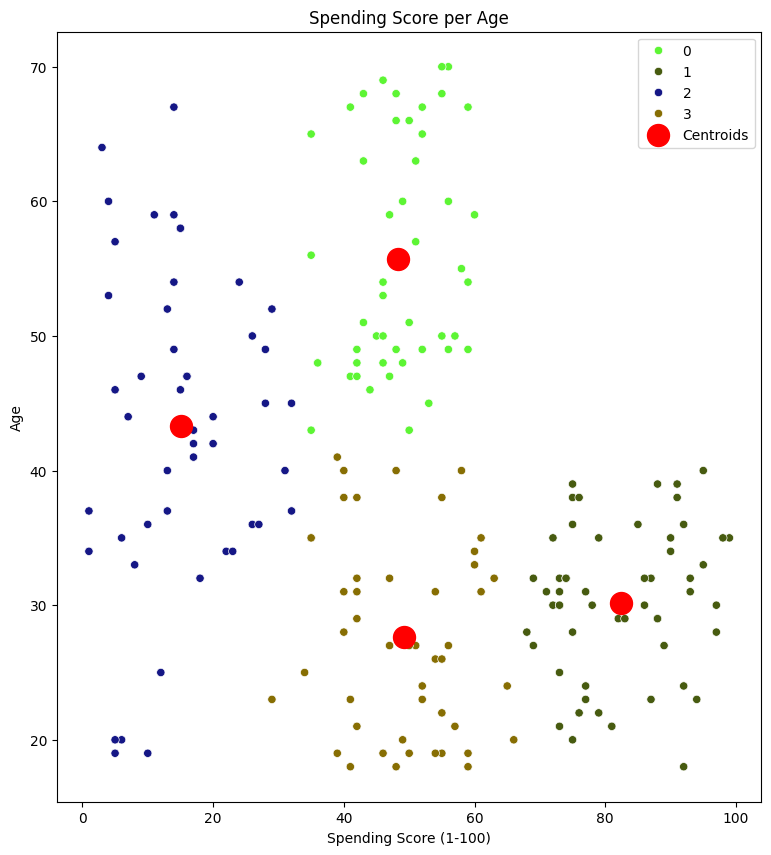

In [107]:
# define numero de cluster e treina o modelo
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df)

# Adicionar previsões de clusters aos dados
df['Clusters'] = kmeans.labels_

# Obtem os centroids dos clusters
centroids = kmeans.cluster_centers_

# Definir cores para os clusters
colors = ['#5DF534', '#475B10', '#151786', '#876E03']
df['color'] = df['Clusters'].map(lambda x: colors[x])

# Plotar o gráfico de dispersão 2D
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.scatterplot(x="Spending Score (1-100)", y="Age", hue='Clusters', palette=colors, data=df)
plt.scatter(centroids[:, 1], centroids[:, 0], marker='o', s=250, c='red', label='Centroids')
plt.title('Spending Score per Age')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Age')
plt.legend()


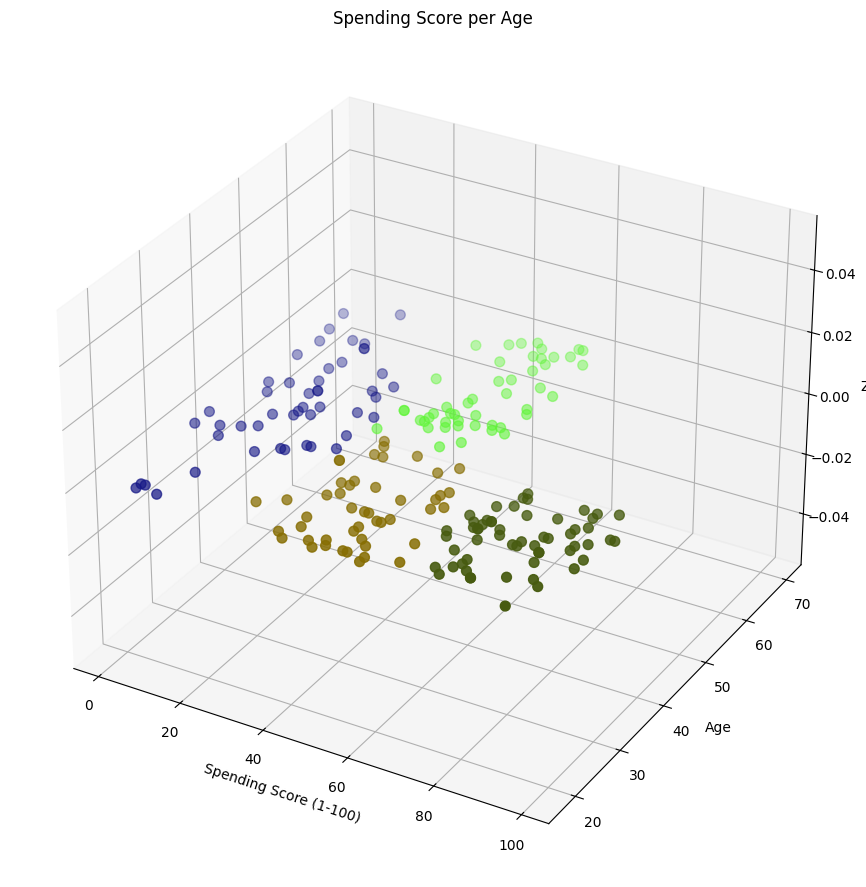

In [108]:
# Plotar o gráfico 3D
fig = plt.figure(figsize=(24, 20))
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter3D(df['Spending Score (1-100)'], df['Age'], np.zeros_like(df['Age']), c=df['color'], s=50)
ax.set_title('Spending Score per Age')
ax.set_xlabel('Spending Score (1-100)')
ax.set_ylabel('Age')
ax.set_zlabel('Z')
plt.show()